In [ ]:
%pip install tensorflow

In [ ]:
%pip install keras

Importing the required libraries for constructing a CNN

Data preprocessing
-------------
1. It involves feature scaling, splitting train, test data and augmentation.
2. Develop a function to generate an exhaustive train data set and apply it to the original data set.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

$\text{Preprocessing the training set}$

We have to generalize and avoid overfitting hence we extend the dataset by providing some distortions like stretching across width,length of the image or rescaling the feature of pixels of the original image , we are doing this to ensure that a rescaled image of dog is still recognizable as a dog instead of some arbitrary object with coincidentally matching weights.

In [2]:
#keras API documentation has been referred while making the following function.
train_function = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_data = train_function.flow_from_directory(
    'Desktop/dataset/training_set/',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.


$\text{Objective achieved ->}$

Normalize pixel values.
Arbitrary shear transformations.
Arbitrary random zooms.
Arbitrary random horizontal flips this helps in improving the robustness of the system.

$\text{Preprocessing the test set}$

We don't want a data leak hence it is imperative to isolate test set from train set for this we still have to apply feature scaling to the pixels of the image since their intensity has to be normalized we only apply rescaling.

In [3]:
test_function = ImageDataGenerator(rescale = 1./255)
test_data = test_function.flow_from_directory(
    'Desktop/dataset/test_set/',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


Building CNNs
----------
1. Convolution layer obtained by a convolving a feature matrix with the image (64x64) decided in the previous code cells and applying an activation function like ReLU, leaky ReLU,etc..
2. Pooling the feature layer after that for reducing stray information, enhancing the robustness of model by avoiding overfitting (setting the strides accordingly).
3. Flatenning applied to generate an output which will act as input to the artificial neural network at the last stage with fully connected hidden layers. 

In [4]:
cnn = tf.keras.models.Sequential()

Here we created a constructor for applying sequence of layers in cnn we want to generate.
In further code cells we only have to append the layer generated from that operation.

Convolution layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 1,activation='relu',input_shape = [64,64,3]))

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

Adding a second convolutional layer 

Input is not provided since it is onnly done for the first layer in a CNN.

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 1,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

Flatenning

In [8]:
cnn.add(tf.keras.layers.Flatten())

Full connection - ANN

In [9]:
cnn.add(tf.keras.layers.Dense(units = 256,activation='relu'))

Output layer - parametrs like output neuron and activation function to be used are 1,sigmoid because we are performing binary classification hence only 1 would suffice to encode and signoid is chosen because we want to evaluate on the basis of probability for multiclass we use softmax activation function.

In [10]:
cnn.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))

Training the neural network
------------
Connect to an optimizer and a loss function

In [12]:
cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [13]:
cnn.fit(x = train_data,validation_data = test_data, epochs = 32)

Epoch 1/32


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 88ms/step - accuracy: 0.5541 - loss: 0.6983 - val_accuracy: 0.6480 - val_loss: 0.6362
Epoch 2/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.6655 - loss: 0.6191 - val_accuracy: 0.6920 - val_loss: 0.5954
Epoch 3/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.6822 - loss: 0.5987 - val_accuracy: 0.6960 - val_loss: 0.5824
Epoch 4/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.6963 - loss: 0.5745 - val_accuracy: 0.6735 - val_loss: 0.6096
Epoch 5/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7019 - loss: 0.5721 - val_accuracy: 0.6980 - val_loss: 0.5721
Epoch 6/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.7263 - loss: 0.5447 - val_accuracy: 0.6925 - val_loss: 0.5928
Epoch 7/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.7085 - loss: 0.5520 - val_accuracy: 0.7350 - val_loss: 0.5497
Epoch 8/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7409 - loss: 0.5338 - val_accurac

Making predictions

In [15]:
import numpy as np
from keras.preprocessing import image

In [21]:
test_img = image.load_img('Desktop/dataset/single_prediction/cat_or_dog_1.jpg',target_size = (64,64))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis = 0)

In [22]:
result = cnn.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Following command allows us to know what a label corresponds to.

In [23]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

result[0][0] is accessed to determine the corresponding output for the image we have used expand_dims method for exapnding the dimension to match that of the batch size 32 hence we access any one of those 32 copies made via expanding and access only bit since it is a binary classification hence a single bit suffices classification and subsequently we get the predicted label.

In [24]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [25]:
print(result)

[[1.]]


Evaluating the performance via test and verifying it.

In [26]:
import matplotlib.pyplot as plt

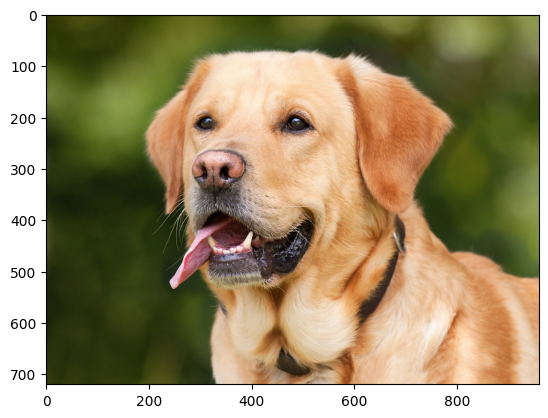

In [30]:
fig=  plt.imread('Desktop/dataset/single_prediction/cat_or_dog_1.jpg')
plt.imshow(fig)
plt.show()